In [17]:
import numpy
import xarray
import matplotlib
import matplotlib.pyplot as mp
import datetime
import matplotlib.colors
import pandas

import wrf
import mpl_toolkits
import cartopy

import netCDF4
import glob

DEGREE_SIGN = u'\u00B0'
mp.rcParams.update({'mathtext.default': 'regular'})

% matplotlib inline

In [2]:
run_info = 'FMAASO'

# import FMAASO 400 data

In [143]:
data_dir = '/beegfs/DATA/pritchard/blangenb/WRF_ARCHIVE/CHEYENNE/FMAASO_2month_incomplete/400'
cont_mfds = xarray.open_mfdataset(data_dir +'/'+ 'wrfout*')

In [37]:
time = cont_mfds['Times'].values

In [22]:
xlat = cont_mfds['XLAT'].values[0,:,:]
xlong = cont_mfds['XLONG'].values[0,:,:]
landmask = cont_mfds['LANDMASK'].values[0,:,:]

In [106]:
lh_400 = cont_mfds['LH']
qfx_400 = cont_mfds['QFX']

rainc_400 = cont_mfds['RAINC']
rainnc_400 = cont_mfds['RAINNC']

w_400 = cont_mfds['W']

In [144]:
p_400 = cont_mfds['P']
pb_400 = cont_mfds['PB']

In [31]:
file_list = glob.glob(data_dir+'/'+'wrfout*')
ds_list = [netCDF4.Dataset(file) for file in file_list]

In [33]:
prw_400 = wrf.getvar(ds_list, 'pw', timeidx=wrf.ALL_TIMES)

# import FMAASO 1000 data

In [107]:
data_dir = '/beegfs/DATA/pritchard/blangenb/WRF_ARCHIVE/CHEYENNE/FMAASO_2month_incomplete/1000'
cont_mfds = xarray.open_mfdataset(data_dir +'/'+ 'wrfout*')

In [108]:
w_1000 = cont_mfds['W']

In [35]:
lh_1000 = cont_mfds['LH']
qfx_1000 = cont_mfds['QFX']

rainc_1000 = cont_mfds['RAINC']
rainnc_1000 = cont_mfds['RAINNC']

file_list = glob.glob(data_dir+'/'+'wrfout*')
ds_list = [netCDF4.Dataset(file) for file in file_list]

prw_1000 = wrf.getvar(ds_list, 'pw', timeidx=wrf.ALL_TIMES)

# time stamps

In [38]:
time_datetimes = pandas.to_datetime([i.decode('utf-8') for i in time], format = '%Y-%m-%d_%H:%M:%S')

# rain anomalies

In [42]:
raintot_400 = rainc_400 + rainnc_400
raintot_1000 = rainc_1000 + rainnc_1000

raindiff_400 = numpy.diff(raintot_400.values, axis=0)
raindiff_1000 = numpy.diff(raintot_1000.values, axis=0)

In [43]:
rain_diff = raindiff_1000 - raindiff_400

In [109]:
rain_diff_timemean = numpy.mean(rain_diff[10:-1,:,:], axis=0)

In [111]:
prw_diff = prw_1000-prw_400
prw_diff_timemean = numpy.mean(prw_diff[10:-1,:,:], axis=0)

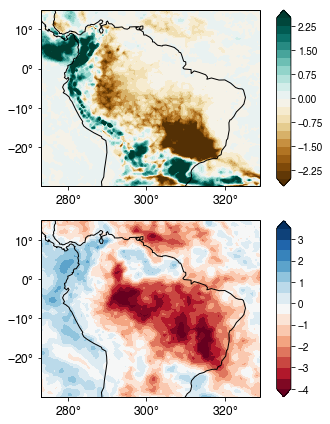

In [123]:
fontsize = 12

fig, axes = mp.subplots(2,1,subplot_kw={'projection':cartopy.crs.PlateCarree()})
fig.set_size_inches(4,6)

axes[0].set_extent([273,329,-30,15], crs=cartopy.crs.PlateCarree())
contour1 = axes[0].contourf(xlong, xlat, rain_diff_timemean, cmap='BrBG', \
                levels=numpy.arange(-2.5,2.51,0.25),\
                #levels=numpy.arange(-.75,0.75,0.125),\
                extend='both', transform=cartopy.crs.PlateCarree())

axes[0].coastlines()
axes[0].set_xticks([-360+280,-360+300,-360+320])
axes[0].set_yticks([-20,-10,0,10])
axes[0].tick_params(labelsize=fontsize)
axes[0].set_xticklabels(['$280$'+DEGREE_SIGN,'$300$'+DEGREE_SIGN,'$320$'+DEGREE_SIGN])
axes[0].set_yticklabels(['$-20$'+DEGREE_SIGN,'$-10$'+DEGREE_SIGN,'$0$'+DEGREE_SIGN,'$10$'+DEGREE_SIGN])

axes[1].set_extent([273,329,-30,15], crs=cartopy.crs.PlateCarree())
contour2 = axes[1].contourf(xlong, xlat, prw_diff_timemean, cmap='RdBu', levels=numpy.arange(-4,4,0.5),\
                extend='both', transform=cartopy.crs.PlateCarree())

axes[1].coastlines()
axes[1].set_xticks([-360+280,-360+300,-360+320])
axes[1].set_yticks([-20,-10,0,10])
axes[1].tick_params(labelsize=fontsize)
axes[1].set_xticklabels(['$280$'+DEGREE_SIGN,'$300$'+DEGREE_SIGN,'$320$'+DEGREE_SIGN])
axes[1].set_yticklabels(['$-20$'+DEGREE_SIGN,'$-10$'+DEGREE_SIGN,'$0$'+DEGREE_SIGN,'$10$'+DEGREE_SIGN])

fig.tight_layout()

ax_pos = axes[0].get_position()
cbar_ax = fig.add_axes([ax_pos.x1,ax_pos.y0,0.05,ax_pos.height])
cbar1 = mp.colorbar(contour1, cax=cbar_ax)

ax_pos = axes[1].get_position()
cbar_ax = fig.add_axes([ax_pos.x1,ax_pos.y0,0.05,ax_pos.height])
cbar2 = mp.colorbar(contour2, cax=cbar_ax)





# w anomalies

In [131]:
w_diffs = w_1000-w_400
w_diffs_1010 = w_diffs.sel(south_north=slice(-10,10))

In [145]:
ptot_400 = p_400 + pb_400
ptot_400_1010 = ptot_400.sel(south_north=slice(-10,10))

In [136]:
w_diffs_latmean = numpy.mean(w_diffs.values, axis=(2))

In [146]:
ptot_400_latmean = numpy.mean(ptot_400.values, axis=(2))

In [151]:
w_diffs_timemean = numpy.mean(w_diffs_latmean[10:-1,:,:], axis=0)
w_diffs_timemean_midpoints = 0.5*(w_diffs_timemean[:1,:]+w_diffs_timemean[:-1,:])

In [147]:
ptot_400_timemean = numpy.mean(ptot_400_latmean[10:-1,:,:], axis=0)

In [148]:
xx,zz=numpy.meshgrid(xlong[0,:],ptot_400_timemean[:,0])

/export/home/blangenb/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


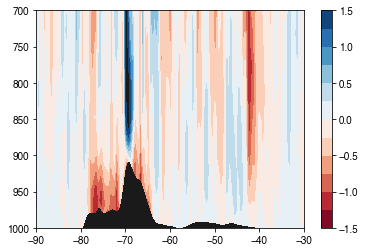

In [162]:
cf=mp.contourf(xx,ptot_400_timemean/100.,w_diffs_timemean_midpoints*1000, levels = numpy.arange(-1.5,1.51,0.25), cmap='RdBu');mp.colorbar(cf)
mp.axes().set_ylim(1000,700)
mp.axes().set_xlim(-90,-30)
mp.axes().set_facecolor('0.1')

In [44]:
data_dir = '/beegfs/DATA/pritchard/blangenb/WRF_ARCHIVE/CHEYENNE/FMAASO/1000/concat_nc_files/'
filename_prefix = 'wrfout_d01_1979-01-01_00:00:00_1979-01-11_00:00:00_'
filename_suffix = '_ens_mean.nc'

time_ncfile = xarray.open_dataset(times_ncfile_name)
xlat_ncfile = xarray.open_dataset(xlat_ncfile_name)
xlong_ncfile = xarray.open_dataset(xlong_ncfile_name)
landmask_ncfile = xarray.open_dataset(landmask_ncfile_name)

lh_ncfile = xarray.open_dataset(data_dir + filename_prefix + 'LH' + filename_suffix)
rainc_ncfile = xarray.open_dataset(data_dir + filename_prefix + 'RAINC' + filename_suffix)
rainnc_ncfile = xarray.open_dataset(data_dir + filename_prefix + 'RAINNC' + filename_suffix)
t2_ncfile = xarray.open_dataset(data_dir + filename_prefix + 'T2' + filename_suffix)
qfx_ncfile = xarray.open_dataset(data_dir + filename_prefix + 'QFX' + filename_suffix)

ecan_ncfile = xarray.open_dataset(data_dir + filename_prefix + 'ECAN' + filename_suffix)
edir_ncfile = xarray.open_dataset(data_dir + filename_prefix + 'EDIR' + filename_suffix)
etran_ncfile = xarray.open_dataset(data_dir + filename_prefix + 'ETRAN' + filename_suffix)

pblh_ncfile = xarray.open_dataset(data_dir + filename_prefix + 'PBLH' + filename_suffix)

In [13]:
time_var_1000 = time_ncfile.variables['Times']
time_1000 = time_ncfile.variables['Times'].values
xlat = xlat_ncfile.variables['XLAT'].values[0,:,:]
xlong = xlong_ncfile.variables['XLONG'].values[0,:,:]
landmask = landmask_ncfile.variables['LANDMASK'].values[0,:,:]

lh_1000 = lh_ncfile.variables['LH'].values
rainc_1000 = rainc_ncfile.variables['RAINC'].values
rainnc_1000 = rainnc_ncfile.variables['RAINNC'].values
qfx_1000 = qfx_ncfile.variables['QFX'].values*86400.
t2_1000 = t2_ncfile.variables['T2'].values

ecan_1000 = ecan_ncfile.variables['ECAN'].values*86400.
edir_1000 = edir_ncfile.variables['EDIR'].values*86400.
etran_1000 = etran_ncfile.variables['ETRAN'].values*86400.

In [14]:
prw_1000 = numpy.load('DATA_prw_1000.npy')

In [45]:
pblh_1000 = pblh_ncfile.variables['PBLH'].values

# get time stamps

In [15]:
time_datetimes = pandas.to_datetime([i.decode('utf-8') for i in time], format = '%Y-%m-%d_%H:%M:%S')

In [16]:
skip_time = 24
n_intervals = 8
hour_strings = ['00','03','06','09','12','15','18','21']

times_00 = [t.hour in [23,0,1] for t in time_datetimes[skip_time:]]
times_03 = [t.hour in [2,3,4] for t in time_datetimes[skip_time:]]
times_06 = [t.hour in [5,6,7] for t in time_datetimes[skip_time:]]
times_09 = [t.hour in [8,9,10] for t in time_datetimes[skip_time:]]
times_12 = [t.hour in [11,12,13] for t in time_datetimes[skip_time:]]
times_15 = [t.hour in [14,15,16] for t in time_datetimes[skip_time:]]
times_18 = [t.hour in [17,18,19] for t in time_datetimes[skip_time:]]
times_21 = [t.hour in [20,21,22] for t in time_datetimes[skip_time:]]

# PRW differences

In [35]:
prw_diffs = prw_1000-prw_400
prw_diffs_time_mean = numpy.mean(prw_diffs, axis=0)
prw_400_time_mean = numpy.mean(prw_400, axis=0)

# PBLH differences

In [51]:
pblh_diffs = pblh_1000-pblh_400
pblh_diffs_time_mean = numpy.mean(pblh_diffs, axis=0)
pblh_400_time_mean = numpy.mean(pblh_400, axis=0)

pblh_diffs_landmask = numpy.copy(pblh_diffs)
pblh_diffs_landmask[:,landmask==0] = numpy.nan

pblh_400_landmask = numpy.copy(pblh_400)
pblh_400_landmask[:,landmask==0] = numpy.nan

pblh_diffs_time_mean_landmask = numpy.nanmean(pblh_diffs_landmask, axis=0)
pblh_400_time_mean_landmask = numpy.nanmean(pblh_400_landmask, axis=0)

/export/home/blangenb/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: Mean of empty slice
  # This is added back by InteractiveShellApp.init_path()
/export/home/blangenb/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: Mean of empty slice
  if sys.path[0] == '':


# LH differences

In [17]:
# calculate 3 hourly means for 400
lh_400_t00mean = numpy.mean(lh_400[skip_time:,:,:][times_00,:,:], axis=0)
lh_400_t03mean = numpy.mean(lh_400[skip_time:,:,:][times_03,:,:], axis=0)
lh_400_t06mean = numpy.mean(lh_400[skip_time:,:,:][times_06,:,:], axis=0)
lh_400_t09mean = numpy.mean(lh_400[skip_time:,:,:][times_09,:,:], axis=0)
lh_400_t12mean = numpy.mean(lh_400[skip_time:,:,:][times_12,:,:], axis=0)
lh_400_t15mean = numpy.mean(lh_400[skip_time:,:,:][times_15,:,:], axis=0)
lh_400_t18mean = numpy.mean(lh_400[skip_time:,:,:][times_18,:,:], axis=0)
lh_400_t21mean = numpy.mean(lh_400[skip_time:,:,:][times_21,:,:], axis=0)

lh_1000_t00mean = numpy.mean(lh_1000[skip_time:,:,:][times_00,:,:], axis=0)
lh_1000_t03mean = numpy.mean(lh_1000[skip_time:,:,:][times_03,:,:], axis=0)
lh_1000_t06mean = numpy.mean(lh_1000[skip_time:,:,:][times_06,:,:], axis=0)
lh_1000_t09mean = numpy.mean(lh_1000[skip_time:,:,:][times_09,:,:], axis=0)
lh_1000_t12mean = numpy.mean(lh_1000[skip_time:,:,:][times_12,:,:], axis=0)
lh_1000_t15mean = numpy.mean(lh_1000[skip_time:,:,:][times_15,:,:], axis=0)
lh_1000_t18mean = numpy.mean(lh_1000[skip_time:,:,:][times_18,:,:], axis=0)
lh_1000_t21mean = numpy.mean(lh_1000[skip_time:,:,:][times_21,:,:], axis=0)

lh_400_array = numpy.array([lh_400_t00mean, lh_400_t03mean, lh_400_t06mean, lh_400_t09mean, lh_400_t12mean, lh_400_t15mean, lh_400_t18mean, lh_400_t21mean])
lh_1000_array = numpy.array([lh_1000_t00mean, lh_1000_t03mean, lh_1000_t06mean, lh_1000_t09mean, lh_1000_t12mean, lh_1000_t15mean, lh_1000_t18mean, lh_1000_t21mean])

lh_diffs = lh_1000_array - lh_400_array
lh_diffs_landmask = numpy.copy(lh_diffs)
lh_diffs_landmask[:,landmask==0] = numpy.nan

# monthly mean
lh_diffs_time_mean = numpy.mean(lh_1000[skip_time:,:,:] - lh_400[skip_time:,:,:], axis=0)
lh_diffs_time_mean_landmask = numpy.copy(lh_diffs_time_mean)
lh_diffs_time_mean_landmask[landmask==0] = numpy.nan

lh_400_time_mean = numpy.mean(lh_400[skip_time:,:,:], axis=0)
lh_400_time_mean_landmask = numpy.copy(lh_400_time_mean)
lh_400_time_mean_landmask[landmask==0] = numpy.nan

# QFX differences

In [18]:
# calculate 3 hourly means for 400
qfx_400_t00mean = numpy.mean(qfx_400[skip_time:,:,:][times_00,:,:], axis=0)
qfx_400_t03mean = numpy.mean(qfx_400[skip_time:,:,:][times_03,:,:], axis=0)
qfx_400_t06mean = numpy.mean(qfx_400[skip_time:,:,:][times_06,:,:], axis=0)
qfx_400_t09mean = numpy.mean(qfx_400[skip_time:,:,:][times_09,:,:], axis=0)
qfx_400_t12mean = numpy.mean(qfx_400[skip_time:,:,:][times_12,:,:], axis=0)
qfx_400_t15mean = numpy.mean(qfx_400[skip_time:,:,:][times_15,:,:], axis=0)
qfx_400_t18mean = numpy.mean(qfx_400[skip_time:,:,:][times_18,:,:], axis=0)
qfx_400_t21mean = numpy.mean(qfx_400[skip_time:,:,:][times_21,:,:], axis=0)

qfx_1000_t00mean = numpy.mean(qfx_1000[skip_time:,:,:][times_00,:,:], axis=0)
qfx_1000_t03mean = numpy.mean(qfx_1000[skip_time:,:,:][times_03,:,:], axis=0)
qfx_1000_t06mean = numpy.mean(qfx_1000[skip_time:,:,:][times_06,:,:], axis=0)
qfx_1000_t09mean = numpy.mean(qfx_1000[skip_time:,:,:][times_09,:,:], axis=0)
qfx_1000_t12mean = numpy.mean(qfx_1000[skip_time:,:,:][times_12,:,:], axis=0)
qfx_1000_t15mean = numpy.mean(qfx_1000[skip_time:,:,:][times_15,:,:], axis=0)
qfx_1000_t18mean = numpy.mean(qfx_1000[skip_time:,:,:][times_18,:,:], axis=0)
qfx_1000_t21mean = numpy.mean(qfx_1000[skip_time:,:,:][times_21,:,:], axis=0)

qfx_400_array = numpy.array([qfx_400_t00mean, qfx_400_t03mean, qfx_400_t06mean, qfx_400_t09mean, qfx_400_t12mean, qfx_400_t15mean, qfx_400_t18mean, qfx_400_t21mean])
qfx_1000_array = numpy.array([qfx_1000_t00mean, qfx_1000_t03mean, qfx_1000_t06mean, qfx_1000_t09mean, qfx_1000_t12mean, qfx_1000_t15mean, qfx_1000_t18mean, qfx_1000_t21mean])

qfx_diffs = qfx_1000_array - qfx_400_array
qfx_diffs_landmask = numpy.copy(qfx_diffs)
qfx_diffs_landmask[:,landmask==0] = numpy.nan

# monthly mean
qfx_diffs_time_mean = numpy.mean(qfx_1000[skip_time:,:,:] - qfx_400[skip_time:,:,:], axis=0)
qfx_diffs_time_mean_landmask = numpy.copy(qfx_diffs_time_mean)
qfx_diffs_time_mean_landmask[landmask==0] = numpy.nan

qfx_400_time_mean = numpy.mean(qfx_400[skip_time:,:,:], axis=0)
qfx_400_time_mean_landmask = numpy.copy(qfx_400_time_mean)
qfx_400_time_mean_landmask[landmask==0] = numpy.nan

# RAINC differences

In [19]:
rainc_400_diff = numpy.zeros((rainc_400.shape))*numpy.nan
rainc_400_diff[:-1,:,:] = numpy.diff(rainc_400, axis=0)#*(24./3) # convert to mm/day

rainc_1000_diff = numpy.zeros((rainc_1000.shape))*numpy.nan
rainc_1000_diff[:-1,:,:] = numpy.diff(rainc_1000, axis=0)#*(24./3) # convert to mm/day

# calculate 3 hourly means for 400
rainc_400_t00mean = numpy.nanmean(rainc_400_diff[skip_time:,:,:][times_00,:,:], axis=0)
rainc_400_t03mean = numpy.nanmean(rainc_400_diff[skip_time:,:,:][times_03,:,:], axis=0)
rainc_400_t06mean = numpy.nanmean(rainc_400_diff[skip_time:,:,:][times_06,:,:], axis=0)
rainc_400_t09mean = numpy.nanmean(rainc_400_diff[skip_time:,:,:][times_09,:,:], axis=0)
rainc_400_t12mean = numpy.nanmean(rainc_400_diff[skip_time:,:,:][times_12,:,:], axis=0)
rainc_400_t15mean = numpy.nanmean(rainc_400_diff[skip_time:,:,:][times_15,:,:], axis=0)
rainc_400_t18mean = numpy.nanmean(rainc_400_diff[skip_time:,:,:][times_18,:,:], axis=0)
rainc_400_t21mean = numpy.nanmean(rainc_400_diff[skip_time:,:,:][times_21,:,:], axis=0)

rainc_1000_t00mean = numpy.nanmean(rainc_1000_diff[skip_time:,:,:][times_00,:,:], axis=0)
rainc_1000_t03mean = numpy.nanmean(rainc_1000_diff[skip_time:,:,:][times_03,:,:], axis=0)
rainc_1000_t06mean = numpy.nanmean(rainc_1000_diff[skip_time:,:,:][times_06,:,:], axis=0)
rainc_1000_t09mean = numpy.nanmean(rainc_1000_diff[skip_time:,:,:][times_09,:,:], axis=0)
rainc_1000_t12mean = numpy.nanmean(rainc_1000_diff[skip_time:,:,:][times_12,:,:], axis=0)
rainc_1000_t15mean = numpy.nanmean(rainc_1000_diff[skip_time:,:,:][times_15,:,:], axis=0)
rainc_1000_t18mean = numpy.nanmean(rainc_1000_diff[skip_time:,:,:][times_18,:,:], axis=0)
rainc_1000_t21mean = numpy.nanmean(rainc_1000_diff[skip_time:,:,:][times_21,:,:], axis=0)

rainc_400_array = numpy.array([rainc_400_t00mean, rainc_400_t03mean, rainc_400_t06mean, rainc_400_t09mean, rainc_400_t12mean, rainc_400_t15mean, rainc_400_t18mean, rainc_400_t21mean])
rainc_1000_array = numpy.array([rainc_1000_t00mean, rainc_1000_t03mean, rainc_1000_t06mean, rainc_1000_t09mean, rainc_1000_t12mean, rainc_1000_t15mean, rainc_1000_t18mean, rainc_1000_t21mean])

rainc_diffs = rainc_1000_array - rainc_400_array
rainc_diffs_landmask = numpy.copy(rainc_diffs)
rainc_diffs_landmask[:,landmask==0] = numpy.nan

# RAINNC differences

In [20]:
rainnc_400_diff = numpy.zeros((rainnc_400.shape))*numpy.nan
rainnc_400_diff[:-1,:,:] = numpy.diff(rainnc_400, axis=0)#*(24.) # convert to mm/day

rainnc_1000_diff = numpy.zeros((rainnc_1000.shape))*numpy.nan
rainnc_1000_diff[:-1,:,:] = numpy.diff(rainnc_1000, axis=0)#*(24.) # convert to mm/day


# calculate 3 hourly means for 400
rainnc_400_t00mean = numpy.nanmean(rainnc_400_diff[skip_time:,:,:][times_00,:,:], axis=0)
rainnc_400_t03mean = numpy.nanmean(rainnc_400_diff[skip_time:,:,:][times_03,:,:], axis=0)
rainnc_400_t06mean = numpy.nanmean(rainnc_400_diff[skip_time:,:,:][times_06,:,:], axis=0)
rainnc_400_t09mean = numpy.nanmean(rainnc_400_diff[skip_time:,:,:][times_09,:,:], axis=0)
rainnc_400_t12mean = numpy.nanmean(rainnc_400_diff[skip_time:,:,:][times_12,:,:], axis=0)
rainnc_400_t15mean = numpy.nanmean(rainnc_400_diff[skip_time:,:,:][times_15,:,:], axis=0)
rainnc_400_t18mean = numpy.nanmean(rainnc_400_diff[skip_time:,:,:][times_18,:,:], axis=0)
rainnc_400_t21mean = numpy.nanmean(rainnc_400_diff[skip_time:,:,:][times_21,:,:], axis=0)

rainnc_1000_t00mean = numpy.nanmean(rainnc_1000_diff[skip_time:,:,:][times_00,:,:], axis=0)
rainnc_1000_t03mean = numpy.nanmean(rainnc_1000_diff[skip_time:,:,:][times_03,:,:], axis=0)
rainnc_1000_t06mean = numpy.nanmean(rainnc_1000_diff[skip_time:,:,:][times_06,:,:], axis=0)
rainnc_1000_t09mean = numpy.nanmean(rainnc_1000_diff[skip_time:,:,:][times_09,:,:], axis=0)
rainnc_1000_t12mean = numpy.nanmean(rainnc_1000_diff[skip_time:,:,:][times_12,:,:], axis=0)
rainnc_1000_t15mean = numpy.nanmean(rainnc_1000_diff[skip_time:,:,:][times_15,:,:], axis=0)
rainnc_1000_t18mean = numpy.nanmean(rainnc_1000_diff[skip_time:,:,:][times_18,:,:], axis=0)
rainnc_1000_t21mean = numpy.nanmean(rainnc_1000_diff[skip_time:,:,:][times_21,:,:], axis=0)

rainnc_400_array = numpy.array([rainnc_400_t00mean, rainnc_400_t03mean, rainnc_400_t06mean, rainnc_400_t09mean, rainnc_400_t12mean, rainnc_400_t15mean, rainnc_400_t18mean, rainnc_400_t21mean])
rainnc_1000_array = numpy.array([rainnc_1000_t00mean, rainnc_1000_t03mean, rainnc_1000_t06mean, rainnc_1000_t09mean, rainnc_1000_t12mean, rainnc_1000_t15mean, rainnc_1000_t18mean, rainnc_1000_t21mean])

rainnc_diffs = rainnc_1000_array - rainnc_400_array
rainnc_diffs_landmask = numpy.copy(rainnc_diffs)
rainnc_diffs_landmask[:,landmask==0] = numpy.nan

# RAINTOT differences

In [21]:
raintot_400 = rainc_400+rainnc_400
raintot_1000 = rainc_1000+rainnc_1000

In [22]:
raintot_400_diff = numpy.zeros((raintot_400.shape))*numpy.nan
raintot_400_diff[:-1,:,:] = numpy.diff(raintot_400, axis=0)#*(24./3) # convert to mm/day

raintot_1000_diff = numpy.zeros((raintot_1000.shape))*numpy.nan
raintot_1000_diff[:-1,:,:] = numpy.diff(raintot_1000, axis=0)#*(24./3) # convert to mm/day


# calculate 3 hourly means for 400
raintot_400_t00mean = numpy.nanmean(raintot_400_diff[skip_time:,:,:][times_00,:,:], axis=0)
raintot_400_t03mean = numpy.nanmean(raintot_400_diff[skip_time:,:,:][times_03,:,:], axis=0)
raintot_400_t06mean = numpy.nanmean(raintot_400_diff[skip_time:,:,:][times_06,:,:], axis=0)
raintot_400_t09mean = numpy.nanmean(raintot_400_diff[skip_time:,:,:][times_09,:,:], axis=0)
raintot_400_t12mean = numpy.nanmean(raintot_400_diff[skip_time:,:,:][times_12,:,:], axis=0)
raintot_400_t15mean = numpy.nanmean(raintot_400_diff[skip_time:,:,:][times_15,:,:], axis=0)
raintot_400_t18mean = numpy.nanmean(raintot_400_diff[skip_time:,:,:][times_18,:,:], axis=0)
raintot_400_t21mean = numpy.nanmean(raintot_400_diff[skip_time:,:,:][times_21,:,:], axis=0)

raintot_1000_t00mean = numpy.nanmean(raintot_1000_diff[skip_time:,:,:][times_00,:,:], axis=0)
raintot_1000_t03mean = numpy.nanmean(raintot_1000_diff[skip_time:,:,:][times_03,:,:], axis=0)
raintot_1000_t06mean = numpy.nanmean(raintot_1000_diff[skip_time:,:,:][times_06,:,:], axis=0)
raintot_1000_t09mean = numpy.nanmean(raintot_1000_diff[skip_time:,:,:][times_09,:,:], axis=0)
raintot_1000_t12mean = numpy.nanmean(raintot_1000_diff[skip_time:,:,:][times_12,:,:], axis=0)
raintot_1000_t15mean = numpy.nanmean(raintot_1000_diff[skip_time:,:,:][times_15,:,:], axis=0)
raintot_1000_t18mean = numpy.nanmean(raintot_1000_diff[skip_time:,:,:][times_18,:,:], axis=0)
raintot_1000_t21mean = numpy.nanmean(raintot_1000_diff[skip_time:,:,:][times_21,:,:], axis=0)

raintot_400_array = numpy.array([raintot_400_t00mean, raintot_400_t03mean, raintot_400_t06mean, raintot_400_t09mean, raintot_400_t12mean, raintot_400_t15mean, raintot_400_t18mean, raintot_400_t21mean])
raintot_1000_array = numpy.array([raintot_1000_t00mean, raintot_1000_t03mean, raintot_1000_t06mean, raintot_1000_t09mean, raintot_1000_t12mean, raintot_1000_t15mean, raintot_1000_t18mean, raintot_1000_t21mean])

raintot_diffs = raintot_1000_array - raintot_400_array
raintot_diffs_landmask = numpy.copy(raintot_diffs)
raintot_diffs_landmask[:,landmask==0] = numpy.nan

# monthly mean
raintot_diffs_time_mean = numpy.nanmean(raintot_1000_diff[skip_time:,:,:] - raintot_400_diff[skip_time:,:,:], axis=0)
raintot_diffs_time_mean_landmask = numpy.copy(raintot_diffs_time_mean)
raintot_diffs_time_mean_landmask[landmask==0] = numpy.nan

raintot_400_time_mean = numpy.nanmean(raintot_400_diff[skip_time:,:,:], axis=0)
raintot_400_time_mean_landmask = numpy.copy(raintot_400_time_mean)
raintot_400_time_mean_landmask[landmask==0] = numpy.nan

# T2 differences

In [23]:
# calculate 3 hourly means for 400
t2_400_t00mean = numpy.mean(t2_400[skip_time:,:,:][times_00,:,:], axis=0)
t2_400_t03mean = numpy.mean(t2_400[skip_time:,:,:][times_03,:,:], axis=0)
t2_400_t06mean = numpy.mean(t2_400[skip_time:,:,:][times_06,:,:], axis=0)
t2_400_t09mean = numpy.mean(t2_400[skip_time:,:,:][times_09,:,:], axis=0)
t2_400_t12mean = numpy.mean(t2_400[skip_time:,:,:][times_12,:,:], axis=0)
t2_400_t15mean = numpy.mean(t2_400[skip_time:,:,:][times_15,:,:], axis=0)
t2_400_t18mean = numpy.mean(t2_400[skip_time:,:,:][times_18,:,:], axis=0)
t2_400_t21mean = numpy.mean(t2_400[skip_time:,:,:][times_21,:,:], axis=0)

t2_1000_t00mean = numpy.mean(t2_1000[skip_time:,:,:][times_00,:,:], axis=0)
t2_1000_t03mean = numpy.mean(t2_1000[skip_time:,:,:][times_03,:,:], axis=0)
t2_1000_t06mean = numpy.mean(t2_1000[skip_time:,:,:][times_06,:,:], axis=0)
t2_1000_t09mean = numpy.mean(t2_1000[skip_time:,:,:][times_09,:,:], axis=0)
t2_1000_t12mean = numpy.mean(t2_1000[skip_time:,:,:][times_12,:,:], axis=0)
t2_1000_t15mean = numpy.mean(t2_1000[skip_time:,:,:][times_15,:,:], axis=0)
t2_1000_t18mean = numpy.mean(t2_1000[skip_time:,:,:][times_18,:,:], axis=0)
t2_1000_t21mean = numpy.mean(t2_1000[skip_time:,:,:][times_21,:,:], axis=0)

t2_400_array = numpy.array([t2_400_t00mean, t2_400_t03mean, t2_400_t06mean, t2_400_t09mean, t2_400_t12mean, t2_400_t15mean, t2_400_t18mean, t2_400_t21mean])
t2_1000_array = numpy.array([t2_1000_t00mean, t2_1000_t03mean, t2_1000_t06mean, t2_1000_t09mean, t2_1000_t12mean, t2_1000_t15mean, t2_1000_t18mean, t2_1000_t21mean])

t2_diffs = t2_1000_array - t2_400_array
t2_diffs_landmask = numpy.copy(t2_diffs)
t2_diffs_landmask[:,landmask==0] = numpy.nan

# monthly mean
t2_diffs_time_mean = numpy.mean(t2_1000[skip_time:,:,:] - t2_400[skip_time:,:,:], axis=0)
t2_diffs_time_mean_landmask = numpy.copy(t2_diffs_time_mean)
t2_diffs_time_mean_landmask[landmask==0] = numpy.nan

t2_400_time_mean = numpy.mean(t2_400[skip_time:,:,:], axis=0)
t2_400_time_mean_landmask = numpy.copy(t2_400_time_mean)
t2_400_time_mean_landmask[landmask==0] = numpy.nan

# ECAN differences

In [24]:
# calculate 3 hourly means for 400
ecan_400_t00mean = numpy.mean(ecan_400[skip_time:,:,:][times_00,:,:], axis=0)
ecan_400_t03mean = numpy.mean(ecan_400[skip_time:,:,:][times_03,:,:], axis=0)
ecan_400_t06mean = numpy.mean(ecan_400[skip_time:,:,:][times_06,:,:], axis=0)
ecan_400_t09mean = numpy.mean(ecan_400[skip_time:,:,:][times_09,:,:], axis=0)
ecan_400_t12mean = numpy.mean(ecan_400[skip_time:,:,:][times_12,:,:], axis=0)
ecan_400_t15mean = numpy.mean(ecan_400[skip_time:,:,:][times_15,:,:], axis=0)
ecan_400_t18mean = numpy.mean(ecan_400[skip_time:,:,:][times_18,:,:], axis=0)
ecan_400_t21mean = numpy.mean(ecan_400[skip_time:,:,:][times_21,:,:], axis=0)

ecan_1000_t00mean = numpy.mean(ecan_1000[skip_time:,:,:][times_00,:,:], axis=0)
ecan_1000_t03mean = numpy.mean(ecan_1000[skip_time:,:,:][times_03,:,:], axis=0)
ecan_1000_t06mean = numpy.mean(ecan_1000[skip_time:,:,:][times_06,:,:], axis=0)
ecan_1000_t09mean = numpy.mean(ecan_1000[skip_time:,:,:][times_09,:,:], axis=0)
ecan_1000_t12mean = numpy.mean(ecan_1000[skip_time:,:,:][times_12,:,:], axis=0)
ecan_1000_t15mean = numpy.mean(ecan_1000[skip_time:,:,:][times_15,:,:], axis=0)
ecan_1000_t18mean = numpy.mean(ecan_1000[skip_time:,:,:][times_18,:,:], axis=0)
ecan_1000_t21mean = numpy.mean(ecan_1000[skip_time:,:,:][times_21,:,:], axis=0)

ecan_400_array = numpy.array([ecan_400_t00mean, ecan_400_t03mean, ecan_400_t06mean, ecan_400_t09mean, ecan_400_t12mean, ecan_400_t15mean, ecan_400_t18mean, ecan_400_t21mean])
ecan_1000_array = numpy.array([ecan_1000_t00mean, ecan_1000_t03mean, ecan_1000_t06mean, ecan_1000_t09mean, ecan_1000_t12mean, ecan_1000_t15mean, ecan_1000_t18mean, ecan_1000_t21mean])

ecan_diffs = ecan_1000_array - ecan_400_array
ecan_diffs_landmask = numpy.copy(ecan_diffs)
ecan_diffs_landmask[:,landmask==0] = numpy.nan

ecan_diffs_time_mean = numpy.mean(ecan_1000[skip_time:,:,:] - ecan_400[skip_time:,:,:], axis=0)
ecan_diffs_time_mean_landmask = numpy.copy(ecan_diffs_time_mean)
ecan_diffs_time_mean_landmask[landmask==0] = numpy.nan

ecan_400_time_mean = numpy.mean(ecan_400[skip_time:,:,:], axis=0)
ecan_400_time_mean_landmask = numpy.copy(ecan_400_time_mean)
ecan_400_time_mean_landmask[landmask==0] = numpy.nan

# ETRAN differences

In [25]:
# calculate 3 hourly means for 400
etran_400_t00mean = numpy.mean(etran_400[skip_time:,:,:][times_00,:,:], axis=0)
etran_400_t03mean = numpy.mean(etran_400[skip_time:,:,:][times_03,:,:], axis=0)
etran_400_t06mean = numpy.mean(etran_400[skip_time:,:,:][times_06,:,:], axis=0)
etran_400_t09mean = numpy.mean(etran_400[skip_time:,:,:][times_09,:,:], axis=0)
etran_400_t12mean = numpy.mean(etran_400[skip_time:,:,:][times_12,:,:], axis=0)
etran_400_t15mean = numpy.mean(etran_400[skip_time:,:,:][times_15,:,:], axis=0)
etran_400_t18mean = numpy.mean(etran_400[skip_time:,:,:][times_18,:,:], axis=0)
etran_400_etran1mean = numpy.mean(etran_400[skip_time:,:,:][times_21,:,:], axis=0)

etran_1000_t00mean = numpy.mean(etran_1000[skip_time:,:,:][times_00,:,:], axis=0)
etran_1000_t03mean = numpy.mean(etran_1000[skip_time:,:,:][times_03,:,:], axis=0)
etran_1000_t06mean = numpy.mean(etran_1000[skip_time:,:,:][times_06,:,:], axis=0)
etran_1000_t09mean = numpy.mean(etran_1000[skip_time:,:,:][times_09,:,:], axis=0)
etran_1000_t12mean = numpy.mean(etran_1000[skip_time:,:,:][times_12,:,:], axis=0)
etran_1000_t15mean = numpy.mean(etran_1000[skip_time:,:,:][times_15,:,:], axis=0)
etran_1000_t18mean = numpy.mean(etran_1000[skip_time:,:,:][times_18,:,:], axis=0)
etran_1000_etran1mean = numpy.mean(etran_1000[skip_time:,:,:][times_21,:,:], axis=0)

etran_400_array = numpy.array([etran_400_t00mean, etran_400_t03mean, etran_400_t06mean, etran_400_t09mean, etran_400_t12mean, etran_400_t15mean, etran_400_t18mean, etran_400_etran1mean])
etran_1000_array = numpy.array([etran_1000_t00mean, etran_1000_t03mean, etran_1000_t06mean, etran_1000_t09mean, etran_1000_t12mean, etran_1000_t15mean, etran_1000_t18mean, etran_1000_etran1mean])

etran_diffs = etran_1000_array - etran_400_array
etran_diffs_landmask = numpy.copy(etran_diffs)
etran_diffs_landmask[:,landmask==0] = numpy.nan

etran_diffs_time_mean = numpy.mean(etran_1000[skip_time:,:,:] - etran_400[skip_time:,:,:], axis=0)
etran_diffs_time_mean_landmask = numpy.copy(etran_diffs_time_mean)
etran_diffs_time_mean_landmask[landmask==0] = numpy.nan

etran_400_time_mean = numpy.mean(etran_400[skip_time:,:,:], axis=0)
etran_400_time_mean_landmask = numpy.copy(etran_400_time_mean)
etran_400_time_mean_landmask[landmask==0] = numpy.nan

# EDIR differences

In [26]:
# calculate 3 hourly means for 400
edir_400_t00mean = numpy.mean(edir_400[skip_time:,:,:][times_00,:,:], axis=0)
edir_400_t03mean = numpy.mean(edir_400[skip_time:,:,:][times_03,:,:], axis=0)
edir_400_t06mean = numpy.mean(edir_400[skip_time:,:,:][times_06,:,:], axis=0)
edir_400_t09mean = numpy.mean(edir_400[skip_time:,:,:][times_09,:,:], axis=0)
edir_400_t12mean = numpy.mean(edir_400[skip_time:,:,:][times_12,:,:], axis=0)
edir_400_t15mean = numpy.mean(edir_400[skip_time:,:,:][times_15,:,:], axis=0)
edir_400_t18mean = numpy.mean(edir_400[skip_time:,:,:][times_18,:,:], axis=0)
edir_400_t21mean = numpy.mean(edir_400[skip_time:,:,:][times_21,:,:], axis=0)

edir_1000_t00mean = numpy.mean(edir_1000[skip_time:,:,:][times_00,:,:], axis=0)
edir_1000_t03mean = numpy.mean(edir_1000[skip_time:,:,:][times_03,:,:], axis=0)
edir_1000_t06mean = numpy.mean(edir_1000[skip_time:,:,:][times_06,:,:], axis=0)
edir_1000_t09mean = numpy.mean(edir_1000[skip_time:,:,:][times_09,:,:], axis=0)
edir_1000_t12mean = numpy.mean(edir_1000[skip_time:,:,:][times_12,:,:], axis=0)
edir_1000_t15mean = numpy.mean(edir_1000[skip_time:,:,:][times_15,:,:], axis=0)
edir_1000_t18mean = numpy.mean(edir_1000[skip_time:,:,:][times_18,:,:], axis=0)
edir_1000_t21mean = numpy.mean(edir_1000[skip_time:,:,:][times_21,:,:], axis=0)

edir_400_array = numpy.array([edir_400_t00mean, edir_400_t03mean, edir_400_t06mean, edir_400_t09mean, edir_400_t12mean, edir_400_t15mean, edir_400_t18mean, edir_400_t21mean])
edir_1000_array = numpy.array([edir_1000_t00mean, edir_1000_t03mean, edir_1000_t06mean, edir_1000_t09mean, edir_1000_t12mean, edir_1000_t15mean, edir_1000_t18mean, edir_1000_t21mean])

edir_diffs = edir_1000_array - edir_400_array
edir_diffs_landmask = numpy.copy(edir_diffs)
edir_diffs_landmask[:,landmask==0] = numpy.nan

edir_diffs_time_mean = numpy.mean(edir_1000[skip_time:,:,:] - edir_400[skip_time:,:,:], axis=0)
edir_diffs_time_mean_landmask = numpy.copy(edir_diffs_time_mean)
edir_diffs_time_mean_landmask[landmask==0] = numpy.nan

edir_400_time_mean = numpy.mean(edir_400[skip_time:,:,:], axis=0)
edir_400_time_mean_landmask = numpy.copy(edir_400_time_mean)
edir_400_time_mean_landmask[landmask==0] = numpy.nan

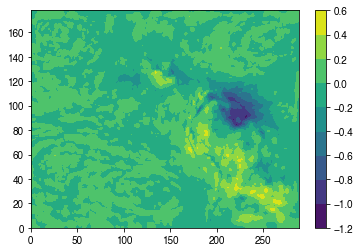

In [179]:
cf=mp.contourf(prw_diffs_time_mean);mp.colorbar(cf)

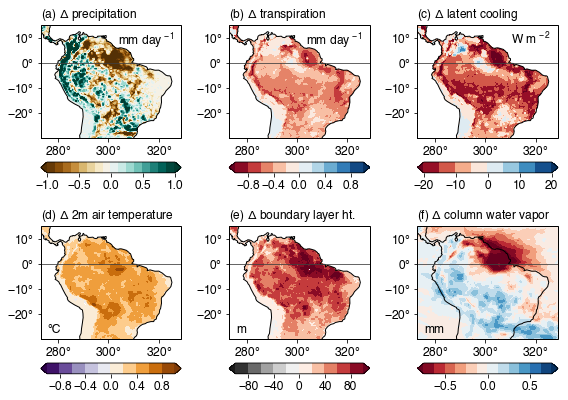

In [183]:
# MONTHLY MEAN PLOTS

fig = mp.figure(figsize=(8,6))
fontsize = 12

# RAINTOT

levels = numpy.arange(-1,1.1,0.125)
ax1 = fig.add_subplot(231, projection=cartopy.crs.PlateCarree())
ax1.gridlines(ylocs=[0], color='0.25')
ax1.coastlines(resolution='110m')
ax1.set_extent([xlong.min()+lon_offset, xlong.max(), xlat.min(), xlat.max()], crs=cartopy.crs.PlateCarree())
contour_plot1 = ax1.contourf(xlong, xlat, raintot_diffs_time_mean_landmask*24., \
                             levels=levels, \
                             cmap='BrBG', extend='both', transform=cartopy.crs.PlateCarree())

# DELTA TRANSPIRATION

levels = numpy.arange(-1,1.1,0.2)
ax2 = fig.add_subplot(232, projection=cartopy.crs.PlateCarree())
ax2.gridlines(ylocs=[0], color='0.25')
ax2.coastlines(resolution='110m')
ax2.set_extent([xlong.min()+lon_offset, xlong.max(), xlat.min(), xlat.max()], crs=cartopy.crs.PlateCarree())
contour_plot2 = ax2.contourf(xlong, xlat, etran_diffs_time_mean_landmask, levels=levels, \
                             cmap='RdBu', extend='both', transform=cartopy.crs.PlateCarree())

# LH

levels = numpy.arange(-20,21,5)
ax3 = fig.add_subplot(233, projection=cartopy.crs.PlateCarree())
ax3.gridlines(ylocs=[0], color='0.25')
ax3.coastlines(resolution='110m')
ax3.set_extent([xlong.min()+lon_offset, xlong.max(), xlat.min(), xlat.max()], crs=cartopy.crs.PlateCarree())
contour_plot3 = ax3.contourf(xlong, xlat, lh_diffs_time_mean_landmask, levels=levels, \
                             cmap='RdBu', extend='both', transform=cartopy.crs.PlateCarree())

# T2

levels = numpy.arange(-1,1.1,0.2)
ax4 = fig.add_subplot(234, projection=cartopy.crs.PlateCarree())
ax4.gridlines(ylocs=[0], color='0.25')
ax4.coastlines(resolution='110m')
ax4.set_extent([xlong.min()+lon_offset, xlong.max(), xlat.min(), xlat.max()], crs=cartopy.crs.PlateCarree())
contour_plot4 = ax4.contourf(xlong, xlat, t2_diffs_time_mean_landmask, levels=levels, \
                             cmap='PuOr_r', extend='both', transform=cartopy.crs.PlateCarree())

# PBLH

levels = numpy.arange(-100,101,20)
ax5 = fig.add_subplot(235, projection=cartopy.crs.PlateCarree())
ax5.gridlines(ylocs=[0], color='0.25')
ax5.coastlines(resolution='110m')
contour_plot5 = ax5.contourf(xlong, xlat, pblh_diffs_time_mean_landmask, \
                             levels=levels, \
                             cmap='RdGy_r', extend='both', transform=cartopy.crs.PlateCarree())

# PRW

levels = numpy.arange(-.75,.76,0.125)
ax6 = fig.add_subplot(236, projection=cartopy.crs.PlateCarree())
ax6.gridlines(ylocs=[0], color='0.25')
ax6.coastlines(resolution='110m')
contour_plot6 = ax6.contourf(xlong, xlat, prw_diffs_time_mean, \
                             levels=levels, \
                             cmap='RdBu', extend='both', transform=cartopy.crs.PlateCarree())

ax1.set_extent([273,329,-30,15], crs=cartopy.crs.PlateCarree())
ax2.set_extent([273,329,-30,15], crs=cartopy.crs.PlateCarree())
ax3.set_extent([273,329,-30,15], crs=cartopy.crs.PlateCarree())
ax4.set_extent([273,329,-30,15], crs=cartopy.crs.PlateCarree())
ax5.set_extent([273,329,-30,15], crs=cartopy.crs.PlateCarree())
ax6.set_extent([273,329,-30,15], crs=cartopy.crs.PlateCarree())

ax1.set_xticks([-360+280,-360+300,-360+320])
ax1.set_yticks([-20,-10,0,10])
ax1.tick_params(labelsize=fontsize)
ax1.set_xticklabels(['$280$'+DEGREE_SIGN,'$300$'+DEGREE_SIGN,'$320$'+DEGREE_SIGN])
ax1.set_yticklabels(['$-20$'+DEGREE_SIGN,'$-10$'+DEGREE_SIGN,'$0$'+DEGREE_SIGN,'$10$'+DEGREE_SIGN])

ax2.set_xticks([-360+280,-360+300,-360+320])
ax2.set_yticks([-20,-10,0,10])
ax2.tick_params(labelsize=fontsize)
ax2.set_xticklabels(['$280$'+DEGREE_SIGN,'$300$'+DEGREE_SIGN,'$320$'+DEGREE_SIGN])
ax2.set_yticklabels(['$-20$'+DEGREE_SIGN,'$-10$'+DEGREE_SIGN,'$0$'+DEGREE_SIGN,'$10$'+DEGREE_SIGN])

ax3.set_xticks([-360+280,-360+300,-360+320])
ax3.set_yticks([-20,-10,0,10])
ax3.tick_params(labelsize=fontsize)
ax3.set_xticklabels(['$280$'+DEGREE_SIGN,'$300$'+DEGREE_SIGN,'$320$'+DEGREE_SIGN])
ax3.set_yticklabels(['$-20$'+DEGREE_SIGN,'$-10$'+DEGREE_SIGN,'$0$'+DEGREE_SIGN,'$10$'+DEGREE_SIGN])

ax4.set_xticks([-360+280,-360+300,-360+320])
ax4.set_yticks([-20,-10,0,10])
ax4.tick_params(labelsize=fontsize)
ax4.set_xticklabels(['$280$'+DEGREE_SIGN,'$300$'+DEGREE_SIGN,'$320$'+DEGREE_SIGN])
ax4.set_yticklabels(['$-20$'+DEGREE_SIGN,'$-10$'+DEGREE_SIGN,'$0$'+DEGREE_SIGN,'$10$'+DEGREE_SIGN])

ax5.set_xticks([-360+280,-360+300,-360+320])
ax5.set_yticks([-20,-10,0,10])
ax5.tick_params(labelsize=fontsize)
ax5.set_xticklabels(['$280$'+DEGREE_SIGN,'$300$'+DEGREE_SIGN,'$320$'+DEGREE_SIGN])
ax5.set_yticklabels(['$-20$'+DEGREE_SIGN,'$-10$'+DEGREE_SIGN,'$0$'+DEGREE_SIGN,'$10$'+DEGREE_SIGN])

ax6.set_xticks([-360+280,-360+300,-360+320])
ax6.set_yticks([-20,-10,0,10])
ax6.tick_params(labelsize=fontsize)
ax6.set_xticklabels(['$280$'+DEGREE_SIGN,'$300$'+DEGREE_SIGN,'$320$'+DEGREE_SIGN])
ax6.set_yticklabels(['$-20$'+DEGREE_SIGN,'$-10$'+DEGREE_SIGN,'$0$'+DEGREE_SIGN,'$10$'+DEGREE_SIGN])

fig.tight_layout()
fig.canvas.draw_idle()

title = ax1.text(s='(a) $\Delta$ precipitation', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax1.transAxes)
title = ax2.text(s='(b) $\Delta$ transpiration', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax2.transAxes)
title = ax3.text(s='(c) $\Delta$ latent cooling', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax3.transAxes)
title = ax4.text(s='(d) $\Delta$ 2m air temperature', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax4.transAxes)
title = ax5.text(s='(e) $\Delta$ boundary layer ht.', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax5.transAxes)
title = ax6.text(s='(f) $\Delta$ column water vapor', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax6.transAxes)

ax1.text(s='mm day$^{\,-1}$', x=0.95, y=0.95, \
        ha='right', va='top', \
        fontsize=fontsize, \
        transform=ax1.transAxes)
ax2.text(s='mm day$^{\,-1}$', x=0.95, y=0.95, \
        ha='right', va='top', \
        fontsize=fontsize, \
        transform=ax2.transAxes)
ax3.text(s='W m$^{\,-2}$', x=0.95, y=0.95, \
        ha='right', va='top', \
        fontsize=fontsize, \
        transform=ax3.transAxes)
ax4.text(s=DEGREE_SIGN+'C', x=0.05, y=0.03, \
        ha='left', va='bottom', \
        fontsize=fontsize, \
        transform=ax4.transAxes)
ax5.text(s='m', x=0.05, y=0.03, \
        ha='left', va='bottom', \
        fontsize=fontsize, \
        transform=ax5.transAxes)
ax6.text(s='mm', x=0.05, y=0.03, \
        ha='left', va='bottom', \
        fontsize=fontsize, \
        transform=ax6.transAxes)

bbox_position = ax1.get_position()
cbar_axes = fig.add_axes([bbox_position.x0, bbox_position.y0+cbar_yshift, bbox_position.width, cbar_thickness])
cbar = mp.colorbar(contour_plot1, orientation='horizontal', cax=cbar_axes)
#cbar.set_label(label='mm day$^{-1}$', fontsize=fontsize)
cbar_axes.tick_params(labelsize=fontsize)
cbar.set_ticks([numpy.arange(-1,1.1,0.5)])

bbox_position = ax2.get_position()
cbar_axes = fig.add_axes([bbox_position.x0, bbox_position.y0+cbar_yshift, bbox_position.width, cbar_thickness])
cbar = mp.colorbar(contour_plot2, orientation='horizontal', cax=cbar_axes)
#cbar.set_label(label='mm day$^{-1}$', fontsize=fontsize)
cbar_axes.tick_params(labelsize=fontsize)

bbox_position = ax3.get_position()
cbar_axes = fig.add_axes([bbox_position.x0, bbox_position.y0+cbar_yshift, bbox_position.width, cbar_thickness])
cbar = mp.colorbar(contour_plot3, orientation='horizontal', cax=cbar_axes)
#cbar.set_label(label='W m$^{-2}$', fontsize=fontsize)
cbar_axes.tick_params(labelsize=fontsize)
cbar.set_ticks(numpy.arange(-20,21,10))

bbox_position = ax4.get_position()
cbar_axes = fig.add_axes([bbox_position.x0, bbox_position.y0+cbar_yshift, bbox_position.width, cbar_thickness])
cbar = mp.colorbar(contour_plot4, orientation='horizontal', cax=cbar_axes)
#cbar.set_label(label=degree_sign+'C', fontsize=fontsize)
cbar_axes.tick_params(labelsize=fontsize)

bbox_position = ax5.get_position()
cbar_axes = fig.add_axes([bbox_position.x0, bbox_position.y0+cbar_yshift, bbox_position.width, cbar_thickness])
cbar = mp.colorbar(contour_plot5, orientation='horizontal', cax=cbar_axes)
#cbar.set_label(label=degree_sign+'C', fontsize=fontsize)
cbar_axes.tick_params(labelsize=fontsize)

bbox_position = ax6.get_position()
cbar_axes = fig.add_axes([bbox_position.x0, bbox_position.y0+cbar_yshift, bbox_position.width, cbar_thickness])
cbar = mp.colorbar(contour_plot6, orientation='horizontal', cax=cbar_axes)
#cbar.set_label(label=degree_sign+'C', fontsize=fontsize)
cbar_axes.tick_params(labelsize=fontsize)
cbar.set_ticks([-.5,0,.5])

#fig.savefig(run_info+'_figure2.pdf', transparent=True, bbox_inches='tight')
fig.savefig('figure2_'+run_info+'.png', dpi=600, transparent=True, bbox_inches='tight')

# plot climatology of these variables

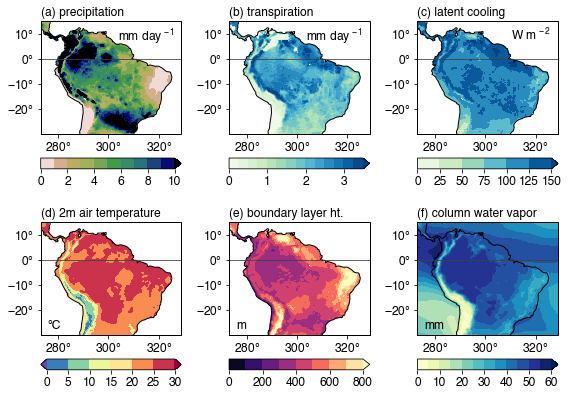

In [187]:
# MONTHLY MEAN PLOTS

fig = mp.figure(figsize=(8,6))
fontsize = 12
lon_offset = 25.

# RAINTOT

levels = numpy.arange(0,10.1,1.)
ax1 = fig.add_subplot(231, projection=cartopy.crs.PlateCarree())
ax1.gridlines(ylocs=[0], color='0.25')
ax1.coastlines(resolution='110m')
ax1.set_extent([xlong.min(), xlong.max(), xlat.min(), xlat.max()], crs=cartopy.crs.PlateCarree())
contour_plot1 = ax1.contourf(xlong, xlat, raintot_400_time_mean_landmask*24., \
                             levels=levels, \
                             cmap='gist_earth_r', extend='max', transform=cartopy.crs.PlateCarree())

# DELTA TRANSPIRATION

levels = numpy.arange(0,3.51,0.25)
ax2 = fig.add_subplot(232, projection=cartopy.crs.PlateCarree())
ax2.gridlines(ylocs=[0], color='0.25')
ax2.coastlines(resolution='110m')
ax2.set_extent([xlong.min(), xlong.max(), xlat.min(), xlat.max()], crs=cartopy.crs.PlateCarree())
contour_plot2 = ax2.contourf(xlong, xlat, etran_400_time_mean_landmask, \
                             levels=levels, \
                             cmap='GnBu', extend='max', transform=cartopy.crs.PlateCarree())

# LH

levels = numpy.arange(0,151,25)
ax3 = fig.add_subplot(233, projection=cartopy.crs.PlateCarree())
ax3.gridlines(ylocs=[0], color='0.25')
ax3.coastlines(resolution='110m')
ax3.set_extent([xlong.min(), xlong.max(), xlat.min(), xlat.max()], crs=cartopy.crs.PlateCarree())
contour_plot3 = ax3.contourf(xlong, xlat, lh_400_time_mean_landmask, \
                             levels=levels, \
                             cmap='GnBu', extend='max', transform=cartopy.crs.PlateCarree())

# T2

levels = numpy.arange(0,31,5)
ax4 = fig.add_subplot(234, projection=cartopy.crs.PlateCarree())
ax4.gridlines(ylocs=[0], color='0.25')
ax4.coastlines(resolution='110m')
ax4.set_extent([xlong.min(), xlong.max(), xlat.min(), xlat.max()], crs=cartopy.crs.PlateCarree())
contour_plot4 = ax4.contourf(xlong, xlat, t2_400_time_mean_landmask-273.15, \
                             levels=levels, \
                             cmap='Spectral_r', extend='both', transform=cartopy.crs.PlateCarree())

# PBLH

levels = numpy.arange(0,801,100)
ax5 = fig.add_subplot(235, projection=cartopy.crs.PlateCarree())
ax5.gridlines(ylocs=[0], color='0.25')
ax5.coastlines(resolution='110m')
ax5.set_extent([xlong.min(), xlong.max(), xlat.min(), xlat.max()], crs=cartopy.crs.PlateCarree())
contour_plot5 = ax5.contourf(xlong, xlat, pblh_400_time_mean_landmask, \
                             levels=levels, \
                             cmap='magma', extend='max', transform=cartopy.crs.PlateCarree())

# prw

levels = numpy.arange(0,61,5)
ax6 = fig.add_subplot(236, projection=cartopy.crs.PlateCarree())
ax6.gridlines(ylocs=[0], color='0.25')
ax6.coastlines(resolution='110m')
ax6.set_extent([xlong.min(), xlong.max(), xlat.min(), xlat.max()], crs=cartopy.crs.PlateCarree())
contour_plot6 = ax6.contourf(xlong, xlat, prw_400_time_mean, \
                             levels=levels, \
                             cmap='YlGnBu', extend='max', transform=cartopy.crs.PlateCarree())

ax1.set_extent([273,329,-30,15], crs=cartopy.crs.PlateCarree())
ax2.set_extent([273,329,-30,15], crs=cartopy.crs.PlateCarree())
ax3.set_extent([273,329,-30,15], crs=cartopy.crs.PlateCarree())
ax4.set_extent([273,329,-30,15], crs=cartopy.crs.PlateCarree())
ax5.set_extent([273,329,-30,15], crs=cartopy.crs.PlateCarree())
ax6.set_extent([273,329,-30,15], crs=cartopy.crs.PlateCarree())

ax1.set_xticks([-360+280,-360+300,-360+320])
ax1.set_yticks([-20,-10,0,10])
ax1.tick_params(labelsize=fontsize)
ax1.set_xticklabels(['$280$'+DEGREE_SIGN,'$300$'+DEGREE_SIGN,'$320$'+DEGREE_SIGN])
ax1.set_yticklabels(['$-20$'+DEGREE_SIGN,'$-10$'+DEGREE_SIGN,'$0$'+DEGREE_SIGN,'$10$'+DEGREE_SIGN])

ax2.set_xticks([-360+280,-360+300,-360+320])
ax2.set_yticks([-20,-10,0,10])
ax2.tick_params(labelsize=fontsize)
ax2.set_xticklabels(['$280$'+DEGREE_SIGN,'$300$'+DEGREE_SIGN,'$320$'+DEGREE_SIGN])
ax2.set_yticklabels(['$-20$'+DEGREE_SIGN,'$-10$'+DEGREE_SIGN,'$0$'+DEGREE_SIGN,'$10$'+DEGREE_SIGN])

ax3.set_xticks([-360+280,-360+300,-360+320])
ax3.set_yticks([-20,-10,0,10])
ax3.tick_params(labelsize=fontsize)
ax3.set_xticklabels(['$280$'+DEGREE_SIGN,'$300$'+DEGREE_SIGN,'$320$'+DEGREE_SIGN])
ax3.set_yticklabels(['$-20$'+DEGREE_SIGN,'$-10$'+DEGREE_SIGN,'$0$'+DEGREE_SIGN,'$10$'+DEGREE_SIGN])

ax4.set_xticks([-360+280,-360+300,-360+320])
ax4.set_yticks([-20,-10,0,10])
ax4.tick_params(labelsize=fontsize)
ax4.set_xticklabels(['$280$'+DEGREE_SIGN,'$300$'+DEGREE_SIGN,'$320$'+DEGREE_SIGN])
ax4.set_yticklabels(['$-20$'+DEGREE_SIGN,'$-10$'+DEGREE_SIGN,'$0$'+DEGREE_SIGN,'$10$'+DEGREE_SIGN])

ax5.set_xticks([-360+280,-360+300,-360+320])
ax5.set_yticks([-20,-10,0,10])
ax5.tick_params(labelsize=fontsize)
ax5.set_xticklabels(['$280$'+DEGREE_SIGN,'$300$'+DEGREE_SIGN,'$320$'+DEGREE_SIGN])
ax5.set_yticklabels(['$-20$'+DEGREE_SIGN,'$-10$'+DEGREE_SIGN,'$0$'+DEGREE_SIGN,'$10$'+DEGREE_SIGN])

ax6.set_xticks([-360+280,-360+300,-360+320])
ax6.set_yticks([-20,-10,0,10])
ax6.tick_params(labelsize=fontsize)
ax6.set_xticklabels(['$280$'+DEGREE_SIGN,'$300$'+DEGREE_SIGN,'$320$'+DEGREE_SIGN])
ax6.set_yticklabels(['$-20$'+DEGREE_SIGN,'$-10$'+DEGREE_SIGN,'$0$'+DEGREE_SIGN,'$10$'+DEGREE_SIGN])

fig.tight_layout()
fig.canvas.draw_idle()

title = ax1.text(s='(a) precipitation', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax1.transAxes)
title = ax2.text(s='(b) transpiration', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax2.transAxes)
title = ax3.text(s='(c) latent cooling', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax3.transAxes)
title = ax4.text(s='(d) 2m air temperature', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax4.transAxes)
title = ax5.text(s='(e) boundary layer ht.', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax5.transAxes)
title = ax6.text(s='(f) column water vapor', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax6.transAxes)

ax1.text(s='mm day$^{\,-1}$', x=0.95, y=0.95, \
        ha='right', va='top', \
        fontsize=fontsize, \
        transform=ax1.transAxes)
ax2.text(s='mm day$^{\,-1}$', x=0.95, y=0.95, \
        ha='right', va='top', \
        fontsize=fontsize, \
        transform=ax2.transAxes)
ax3.text(s='W m$^{\,-2}$', x=0.95, y=0.95, \
        ha='right', va='top', \
        fontsize=fontsize, \
        transform=ax3.transAxes)
ax4.text(s=DEGREE_SIGN+'C', x=0.05, y=0.03, \
        ha='left', va='bottom', \
        fontsize=fontsize, \
        transform=ax4.transAxes)
ax5.text(s='m', x=0.05, y=0.03, \
        ha='left', va='bottom', \
        fontsize=fontsize, \
        transform=ax5.transAxes)
ax6.text(s='mm', x=0.05, y=0.03, \
        ha='left', va='bottom', \
        fontsize=fontsize, \
        transform=ax6.transAxes)


cbar_thickness=0.025
cbar_yshift=-0.08

bbox_position = ax1.get_position()
cbar_axes = fig.add_axes([bbox_position.x0, bbox_position.y0+cbar_yshift, bbox_position.width, cbar_thickness])
cbar = mp.colorbar(contour_plot1, orientation='horizontal', cax=cbar_axes)
cbar_axes.tick_params(labelsize=fontsize)
#cbar.set_ticks([numpy.arange(-1,1.1,0.5)])

bbox_position = ax2.get_position()
cbar_axes = fig.add_axes([bbox_position.x0, bbox_position.y0+cbar_yshift, bbox_position.width, cbar_thickness])
cbar = mp.colorbar(contour_plot2, orientation='horizontal', cax=cbar_axes)
cbar_axes.tick_params(labelsize=fontsize)
cbar.set_ticks([0,1,2,3])

bbox_position = ax3.get_position()
cbar_axes = fig.add_axes([bbox_position.x0, bbox_position.y0+cbar_yshift, bbox_position.width, cbar_thickness])
cbar = mp.colorbar(contour_plot3, orientation='horizontal', cax=cbar_axes)
cbar_axes.tick_params(labelsize=fontsize)
#cbar.set_ticks(numpy.arange(-20,21,10))

bbox_position = ax4.get_position()
cbar_axes = fig.add_axes([bbox_position.x0, bbox_position.y0+cbar_yshift, bbox_position.width, cbar_thickness])
cbar = mp.colorbar(contour_plot4, orientation='horizontal', cax=cbar_axes)
cbar_axes.tick_params(labelsize=fontsize)
#cbar.set_ticks(numpy.arange(280,301,5))

bbox_position = ax5.get_position()
cbar_axes = fig.add_axes([bbox_position.x0, bbox_position.y0+cbar_yshift, bbox_position.width, cbar_thickness])
cbar = mp.colorbar(contour_plot5, orientation='horizontal', cax=cbar_axes)
cbar_axes.tick_params(labelsize=fontsize)
cbar.set_ticks([0,200,400,600,800])

bbox_position = ax6.get_position()
cbar_axes = fig.add_axes([bbox_position.x0, bbox_position.y0+cbar_yshift, bbox_position.width, cbar_thickness])
cbar = mp.colorbar(contour_plot6, orientation='horizontal', cax=cbar_axes)
cbar_axes.tick_params(labelsize=fontsize)
#cbar.set_ticks(numpy.arange(-0.2,0.21,0.1))

#fig.savefig(run_info+'_figure2.pdf', transparent=True, bbox_inches='tight')
fig.savefig('CLIM_figure2.X_'+run_info+'.png', dpi=600, transparent=True, bbox_inches='tight')

# as a percent

/export/home/blangenb/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':
/export/home/blangenb/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':
/export/home/blangenb/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
/export/home/blangenb/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide


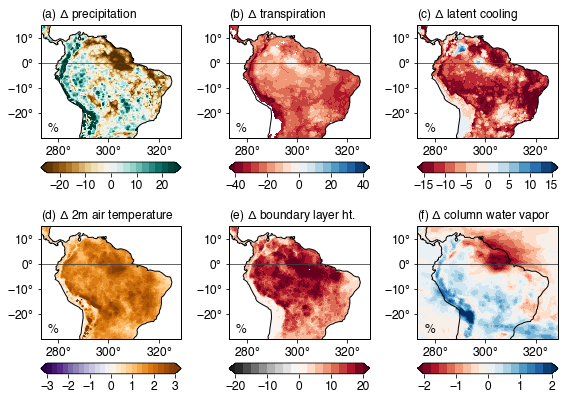

In [167]:
# MONTHLY MEAN PLOTS

fig = mp.figure(figsize=(8,6))
fontsize = 12
lon_offset = 25.

# RAINTOT

perc_diff = (raintot_diffs_time_mean_landmask/raintot_400_time_mean_landmask)*100.
levels = numpy.arange(-25,26,2.5)
ax1 = fig.add_subplot(231, projection=cartopy.crs.PlateCarree())
ax1.gridlines(ylocs=[0], color='0.25')
ax1.coastlines(resolution='110m')
contour_plot1 = ax1.contourf(xlong, xlat, perc_diff, \
                             levels=levels, \
                             cmap='BrBG', extend='both', transform=cartopy.crs.PlateCarree())

# DELTA TRANSPIRATION

perc_diff = (etran_diffs_time_mean_landmask/etran_400_time_mean_landmask)*100.
levels = numpy.arange(-40,41,5)
ax2 = fig.add_subplot(232, projection=cartopy.crs.PlateCarree())
ax2.gridlines(ylocs=[0], color='0.25')
ax2.coastlines(resolution='110m')
contour_plot2 = ax2.contourf(xlong, xlat, perc_diff, \
                             levels=levels, \
                             cmap='RdBu', extend='both', transform=cartopy.crs.PlateCarree())

# LH

perc_diff = (lh_diffs_time_mean_landmask/lh_400_time_mean_landmask)*100.
levels = numpy.arange(-15,16,2.5)
ax3 = fig.add_subplot(233, projection=cartopy.crs.PlateCarree())
ax3.gridlines(ylocs=[0], color='0.25')
ax3.coastlines(resolution='110m')
contour_plot3 = ax3.contourf(xlong, xlat, perc_diff, \
                             levels=levels, \
                             cmap='RdBu', extend='both', transform=cartopy.crs.PlateCarree())

# T2

perc_diff = (t2_diffs_time_mean_landmask/(t2_400_time_mean_landmask-273.15))*100.
levels = numpy.arange(-3,3.1,0.25)
ax4 = fig.add_subplot(234, projection=cartopy.crs.PlateCarree())
ax4.gridlines(ylocs=[0], color='0.25')
ax4.coastlines(resolution='110m')
contour_plot4 = ax4.contourf(xlong, xlat, perc_diff, \
                             levels=levels, \
                             cmap='PuOr_r', extend='both', transform=cartopy.crs.PlateCarree())

# PBLH

perc_diff = (pblh_diffs_time_mean_landmask/pblh_400_time_mean_landmask)*100.
levels = numpy.arange(-20,21,2.5)
ax5 = fig.add_subplot(235, projection=cartopy.crs.PlateCarree())
ax5.gridlines(ylocs=[0], color='0.25')
ax5.coastlines(resolution='110m')
contour_plot5 = ax5.contourf(xlong, xlat, perc_diff, \
                             levels=levels, \
                             cmap='RdGy_r', extend='both', transform=cartopy.crs.PlateCarree())

# PRW

perc_diff = (prw_diffs_time_mean/prw_400_time_mean)*100.
levels = numpy.arange(-2,2.1,0.25)
ax6 = fig.add_subplot(236, projection=cartopy.crs.PlateCarree())
ax6.gridlines(ylocs=[0], color='0.25')
ax6.coastlines(resolution='110m')
contour_plot6 = ax6.contourf(xlong, xlat, perc_diff, \
                             levels=levels, \
                             cmap='RdBu', extend='both', transform=cartopy.crs.PlateCarree())

#ax1.set_extent([xlong.min()+lon_offset, xlong.max(), xlat.min(), xlat.max()], crs=cartopy.crs.PlateCarree())
#ax2.set_extent([xlong.min()+lon_offset, xlong.max(), xlat.min(), xlat.max()], crs=cartopy.crs.PlateCarree())
#ax3.set_extent([xlong.min()+lon_offset, xlong.max(), xlat.min(), xlat.max()], crs=cartopy.crs.PlateCarree())
#ax4.set_extent([xlong.min()+lon_offset, xlong.max(), xlat.min(), xlat.max()], crs=cartopy.crs.PlateCarree())
#ax5.set_extent([xlong.min()+lon_offset, xlong.max(), xlat.min(), xlat.max()], crs=cartopy.crs.PlateCarree())
#ax6.set_extent([xlong.min()+lon_offset, xlong.max(), xlat.min(), xlat.max()], crs=cartopy.crs.PlateCarree())

ax1.set_extent([273,329,-30,15], crs=cartopy.crs.PlateCarree())
ax2.set_extent([273,329,-30,15], crs=cartopy.crs.PlateCarree())
ax3.set_extent([273,329,-30,15], crs=cartopy.crs.PlateCarree())
ax4.set_extent([273,329,-30,15], crs=cartopy.crs.PlateCarree())
ax5.set_extent([273,329,-30,15], crs=cartopy.crs.PlateCarree())
ax6.set_extent([273,329,-30,15], crs=cartopy.crs.PlateCarree())

ax1.set_xticks([-360+280,-360+300,-360+320])
ax1.set_yticks([-20,-10,0,10])
ax1.tick_params(labelsize=fontsize)
ax1.set_xticklabels(['$280$'+DEGREE_SIGN,'$300$'+DEGREE_SIGN,'$320$'+DEGREE_SIGN])
ax1.set_yticklabels(['$-20$'+DEGREE_SIGN,'$-10$'+DEGREE_SIGN,'$0$'+DEGREE_SIGN,'$10$'+DEGREE_SIGN])

ax2.set_xticks([-360+280,-360+300,-360+320])
ax2.set_yticks([-20,-10,0,10])
ax2.tick_params(labelsize=fontsize)
ax2.set_xticklabels(['$280$'+DEGREE_SIGN,'$300$'+DEGREE_SIGN,'$320$'+DEGREE_SIGN])
ax2.set_yticklabels(['$-20$'+DEGREE_SIGN,'$-10$'+DEGREE_SIGN,'$0$'+DEGREE_SIGN,'$10$'+DEGREE_SIGN])

ax3.set_xticks([-360+280,-360+300,-360+320])
ax3.set_yticks([-20,-10,0,10])
ax3.tick_params(labelsize=fontsize)
ax3.set_xticklabels(['$280$'+DEGREE_SIGN,'$300$'+DEGREE_SIGN,'$320$'+DEGREE_SIGN])
ax3.set_yticklabels(['$-20$'+DEGREE_SIGN,'$-10$'+DEGREE_SIGN,'$0$'+DEGREE_SIGN,'$10$'+DEGREE_SIGN])

ax4.set_xticks([-360+280,-360+300,-360+320])
ax4.set_yticks([-20,-10,0,10])
ax4.tick_params(labelsize=fontsize)
ax4.set_xticklabels(['$280$'+DEGREE_SIGN,'$300$'+DEGREE_SIGN,'$320$'+DEGREE_SIGN])
ax4.set_yticklabels(['$-20$'+DEGREE_SIGN,'$-10$'+DEGREE_SIGN,'$0$'+DEGREE_SIGN,'$10$'+DEGREE_SIGN])

ax5.set_xticks([-360+280,-360+300,-360+320])
ax5.set_yticks([-20,-10,0,10])
ax5.tick_params(labelsize=fontsize)
ax5.set_xticklabels(['$280$'+DEGREE_SIGN,'$300$'+DEGREE_SIGN,'$320$'+DEGREE_SIGN])
ax5.set_yticklabels(['$-20$'+DEGREE_SIGN,'$-10$'+DEGREE_SIGN,'$0$'+DEGREE_SIGN,'$10$'+DEGREE_SIGN])

ax6.set_xticks([-360+280,-360+300,-360+320])
ax6.set_yticks([-20,-10,0,10])
ax6.tick_params(labelsize=fontsize)
ax6.set_xticklabels(['$280$'+DEGREE_SIGN,'$300$'+DEGREE_SIGN,'$320$'+DEGREE_SIGN])
ax6.set_yticklabels(['$-20$'+DEGREE_SIGN,'$-10$'+DEGREE_SIGN,'$0$'+DEGREE_SIGN,'$10$'+DEGREE_SIGN])

fig.tight_layout()#h_pad=7, w_pad=3)
fig.canvas.draw_idle()

title = ax1.text(s='(a) $\Delta$ precipitation', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax1.transAxes)
title = ax2.text(s='(b) $\Delta$ transpiration', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax2.transAxes)
title = ax3.text(s='(c) $\Delta$ latent cooling', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax3.transAxes)
title = ax4.text(s='(d) $\Delta$ 2m air temperature', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax4.transAxes)
title = ax5.text(s='(e) $\Delta$ boundary layer ht.', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax5.transAxes)
title = ax6.text(s='(f) $\Delta$ column water vapor', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax6.transAxes)

ax1.text(s='%', x=0.05, y=0.03, \
        ha='left', va='bottom', \
        fontsize=fontsize, \
        transform=ax1.transAxes)
ax2.text(s='%', x=0.05, y=0.03, \
        ha='left', va='bottom', \
        fontsize=fontsize, \
        transform=ax2.transAxes)
ax3.text(s='%', x=0.05, y=0.03, \
        ha='left', va='bottom', \
        fontsize=fontsize, \
        transform=ax3.transAxes)
ax4.text(s='%', x=0.05, y=0.03, \
        ha='left', va='bottom', \
        fontsize=fontsize, \
        transform=ax4.transAxes)
ax5.text(s='%', x=0.05, y=0.03, \
        ha='left', va='bottom', \
        fontsize=fontsize, \
        transform=ax5.transAxes)
ax6.text(s='%', x=0.05, y=0.03, \
        ha='left', va='bottom', \
        fontsize=fontsize, \
        transform=ax6.transAxes)


cbar_thickness=0.025
cbar_yshift=-0.08

bbox_position = ax1.get_position()
cbar_axes = fig.add_axes([bbox_position.x0, bbox_position.y0+cbar_yshift, bbox_position.width, cbar_thickness])
cbar = mp.colorbar(contour_plot1, orientation='horizontal', cax=cbar_axes)
cbar_axes.tick_params(labelsize=fontsize)
cbar.set_ticks([-20,-10,0,10,20])

bbox_position = ax2.get_position()
cbar_axes = fig.add_axes([bbox_position.x0, bbox_position.y0+cbar_yshift, bbox_position.width, cbar_thickness])
cbar = mp.colorbar(contour_plot2, orientation='horizontal', cax=cbar_axes)
cbar_axes.tick_params(labelsize=fontsize)
cbar.set_ticks([-40,-20,0,20,40])

bbox_position = ax3.get_position()
cbar_axes = fig.add_axes([bbox_position.x0, bbox_position.y0+cbar_yshift, bbox_position.width, cbar_thickness])
cbar = mp.colorbar(contour_plot3, orientation='horizontal', cax=cbar_axes)
cbar_axes.tick_params(labelsize=fontsize)
#cbar.set_ticks(numpy.arange(-20,21,10))

bbox_position = ax4.get_position()
cbar_axes = fig.add_axes([bbox_position.x0, bbox_position.y0+cbar_yshift, bbox_position.width, cbar_thickness])
cbar = mp.colorbar(contour_plot4, orientation='horizontal', cax=cbar_axes)
cbar_axes.tick_params(labelsize=fontsize)
cbar.set_ticks([-3,-2,-1,0,1,2,3])

bbox_position = ax5.get_position()
cbar_axes = fig.add_axes([bbox_position.x0, bbox_position.y0+cbar_yshift, bbox_position.width, cbar_thickness])
cbar = mp.colorbar(contour_plot5, orientation='horizontal', cax=cbar_axes)
cbar_axes.tick_params(labelsize=fontsize)
cbar.set_ticks([-20,-10,0,10,20])

bbox_position = ax6.get_position()
cbar_axes = fig.add_axes([bbox_position.x0, bbox_position.y0+cbar_yshift, bbox_position.width, cbar_thickness])
cbar = mp.colorbar(contour_plot6, orientation='horizontal', cax=cbar_axes)
cbar_axes.tick_params(labelsize=fontsize)
cbar.set_ticks([-2,-1,0,1,2])

fig.savefig('FRACTIONAL_figure2.X_'+run_info+'.png', dpi=600, transparent=True, bbox_inches='tight')

# Also FIGURE 4:  LH and T2 differences through diurnal cycle

In [21]:
class MidpointNormalize(matplotlib.colors.Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        matplotlib.colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a
        # simple example...
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return numpy.ma.masked_array(numpy.interp(value, x, y))

In [22]:
print(numpy.hstack((numpy.arange(-40,0.1,5), numpy.arange(0,10,2))))

[-40. -35. -30. -25. -20. -15. -10.  -5.   0.   0.   2.   4.   6.   8.]


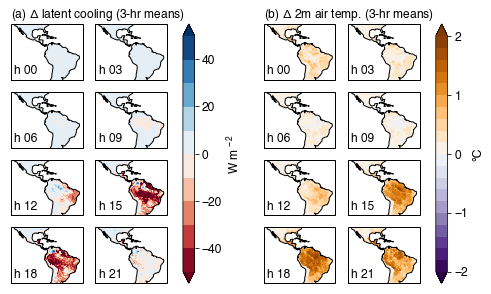

In [23]:
fontsize=12
fig = mp.figure(figsize=(6.5,4))

#contour_levels_left = numpy.hstack((numpy.arange(-60,0,10), numpy.arange(0,11,2)))
contour_levels_left = numpy.arange(-50,51,10)
plot_locations = [1,2,6,7,11,12,16,17]
ax_list_left = []
for i in range(plot_locations.__len__()):
    ax = fig.add_subplot(4,5,plot_locations[i], projection=cartopy.crs.PlateCarree())
    contour_plot_left = ax.contourf(xlong,xlat,lh_diffs_landmask[i,:,:], levels=contour_levels_left, \
                                    cmap='RdBu', extend='both')
                                    #vmax=30, \
                                    #extend='min', \
                                    #norm=MidpointNormalize(midpoint=0.0))
#     contour_plot_left = ax.pcolormesh(xlong,xlat,\
#                                     lh_diffs_landmask[i,:,:], \
#                                     cmap='RdBu', \
#                                     vmax=10, \
#                                     vmin=-60)
#                                     norm=MidpointNormalize(midpoint=0.0))
#     contour_plot_left_lines = ax.contour(xlong,xlat,lh_diffs_landmask[i,:,:], levels=[0], \
#                                     colors=['0.75'], \
#                                     linestyles=[':'], \
#                                     linewidths=[1])
    ax.text(s='h '+hour_strings[i], x=0.05, y=0.05, transform=ax.transAxes, ha='left', va='bottom', fontsize=fontsize)
    ax.tick_params(labelsize=fontsize)
    ax.coastlines(resolution='110m')
    ax_list_left.append(ax)
ax_list_left[0].text(s='(a) $\Delta$ latent cooling (3-hr means)', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax_list_left[0].transAxes)

contour_levels_right = numpy.hstack((numpy.arange(-0.5,0,0.1), numpy.arange(0,2.2,0.25)))
contour_levels_right = numpy.arange(-2,2.1,0.2)

plot_locations = [4,5,9,10,14,15,19,20]
ax_list_right = []
for i in range(plot_locations.__len__()):
    ax = fig.add_subplot(4,5,plot_locations[i], projection=cartopy.crs.PlateCarree())
    contour_plot_right = ax.contourf(xlong,xlat,t2_diffs_landmask[i,:,:], \
                                     levels=contour_levels_right, cmap='PuOr_r', extend='both')
                                     #vmin=contour_levels_right.min(), \
                                     #vmax=contour_levels_right.max(), \
                                     #norm=MidpointNormalize(midpoint=0.0))
    ax.text(s='h '+hour_strings[i], x=0.05, y=0.05, transform=ax.transAxes, ha='left', va='bottom', fontsize=fontsize)
    ax.tick_params(labelsize=fontsize)
    ax.coastlines(resolution='110m')
    ax_list_right.append(ax)
ax_list_right[0].text(s='(b) $\Delta$ 2m air temp. (3-hr means)', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax_list_right[0].transAxes)

fig.tight_layout(w_pad=-2.5, h_pad=0.5)
#fig.canvas.draw_idle()

bbox_top_right = ax_list_left[1].get_position()
bbox_bottom_right = ax_list_left[7].get_position()
cbar_axes = fig.add_axes([bbox_bottom_right.x1+0.0,bbox_bottom_right.y0,0.025,bbox_top_right.y1-bbox_bottom_right.y0])
cbar = fig.colorbar(contour_plot_left, cax=cbar_axes, orientation='vertical')
cbar.set_label('W m$^{\,-2}$', fontsize=fontsize)
cbar.ax.tick_params(labelsize=fontsize)

#fig.tight_layout()
#fig.canvas.draw_idle()

bbox_top_right = ax_list_right[1].get_position()
bbox_bottom_right = ax_list_right[7].get_position()
cbar_axes = fig.add_axes([bbox_bottom_right.x1+0.0,bbox_bottom_right.y0,0.025,bbox_top_right.y1-bbox_bottom_right.y0])
cbar = fig.colorbar(contour_plot_right, cax=cbar_axes, orientation='vertical')
cbar.set_label(DEGREE_SIGN+'C', fontsize=fontsize)
cbar.ax.tick_params(labelsize=fontsize)
cbar.set_ticks(numpy.arange(-2,2.1,1))

#fig.savefig(run_info+'_figure2.pdf', transparent=True, bbox_inches='tight')
fig.savefig('figure4_'+run_info+'.png', dpi=600, transparent=True, bbox_inches='tight')
#fig.text(s='T2m differences (CO$_2$ 1000 minus 400)', x=0.5, y=1.0, ha='center', va='bottom', fontsize=fontsize)
#fig.savefig('T2_differences_3hourly_'+run_info+'.png', bbox_inches='tight', transparent=True, dpi=300)

In [ ]:
print(numpy.nanmax(t2_diffs_landmask[:,:,:]))
print(numpy.nanmin(t2_diffs_landmask[:,:,:]))

print(numpy.nanmax(lh_diffs_landmask[:,:,:]))
print(numpy.nanmin(lh_diffs_landmask[:,:,:]))